In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
Car_df = pd.read_csv(r"car_resale_prices.csv")
Car_df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [40]:
Car_df = Car_df.drop(columns="Unnamed: 0")

In [41]:
Car_df["resale_price"] = pd.to_numeric(Car_df["resale_price"].str.strip(r"₹ Lakh"), errors = "coerce")
Car_df["mileage"] = pd.to_numeric(Car_df["mileage"].str.strip(r"kmpl"), errors = "coerce")

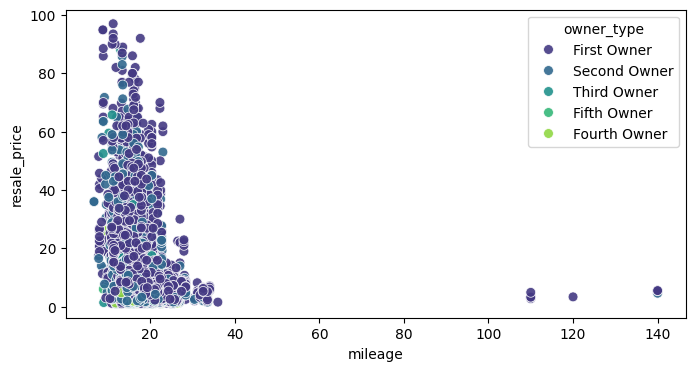

In [42]:
plt.figure(figsize= (8,4))
sns.scatterplot(
    data = Car_df,
    x = "kms_driven",
    y = "resale_price",
    hue = "owner_type",
    palette="viridis",
    s = 50,
    alpha = 0.9
)

plt.show()

In [43]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi


# we make a histogram to see the the distribution of the price , we relaize that there is right skewness

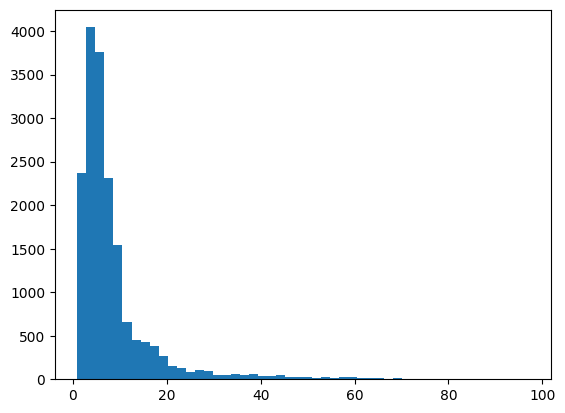

In [41]:

plt.hist(Car_df['resale_price'], bins=50)
plt.show()

### we make summary statistices for resale_price distribution and see that the mean(8.713414478270973) > median(5.96)  which indicates that there is right skew ->meaning there are a small number of very expensive cars pulling the average up 
### The difference between the Q3 (9.055) and the maximum value (97.0) is very large. This confirms the likelihood of high-value outliers

In [48]:
Car_df['resale_price'].describe()


count    17446.000000
mean         8.713414
std          9.623898
min          1.000000
25%          3.900000
50%          5.960000
75%          9.055000
max         97.000000
Name: resale_price, dtype: float64

# we try to take the log for resale_price so the graph become approximtly normal 

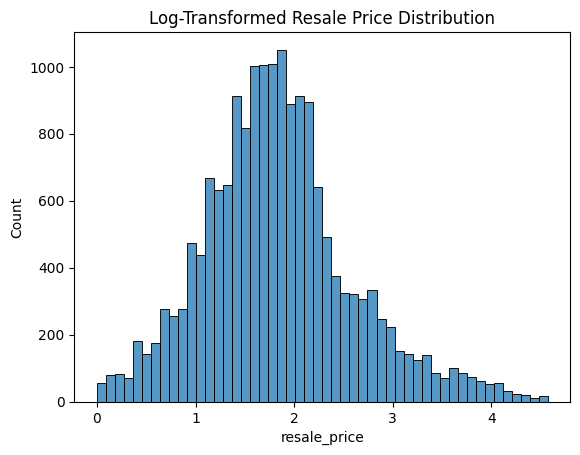

In [45]:
sns.histplot(np.log(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log-Transformed Resale Price Distribution")
plt.show()


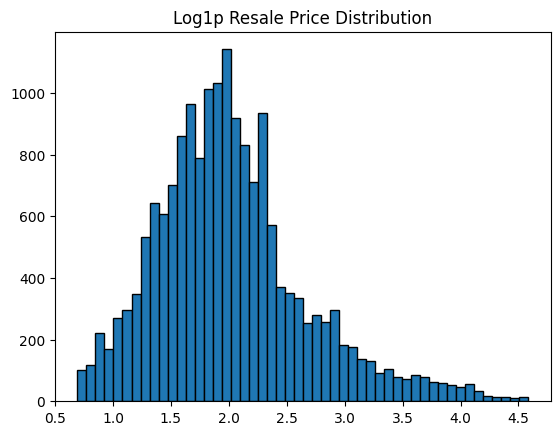

In [46]:
plt.hist(np.log1p(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log1p Resale Price Distribution")
plt.show()


<Axes: xlabel='resale_price'>

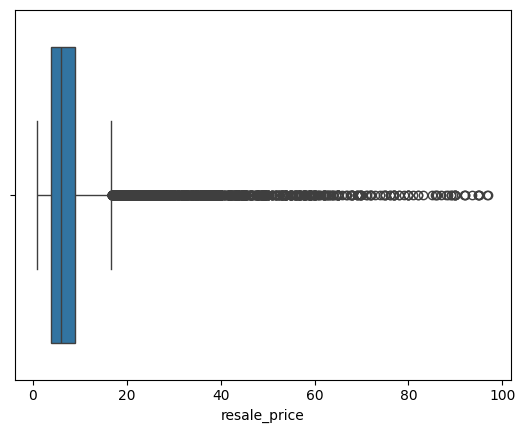

In [32]:
sns.boxplot(x=Car_df['resale_price'])

<Axes: xlabel='resale_price'>

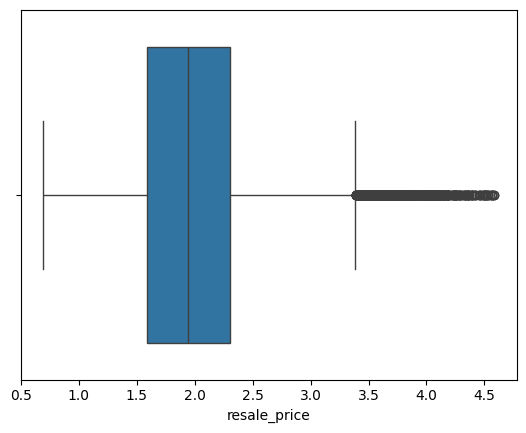

In [34]:
sns.boxplot(x=np.log1p(Car_df['resale_price']))


(0.0, 26.0)

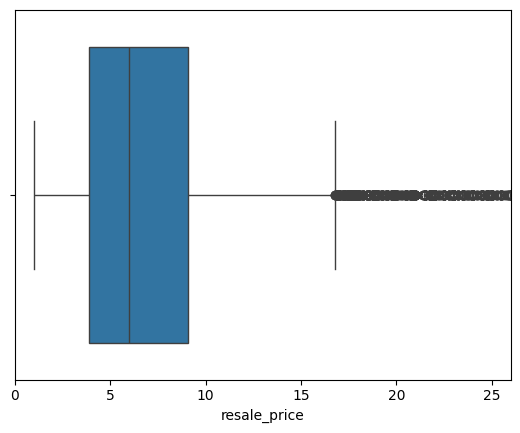

In [44]:
sns.boxplot(x=Car_df['resale_price'])
plt.xlim(0, Car_df['resale_price'].quantile(0.95))


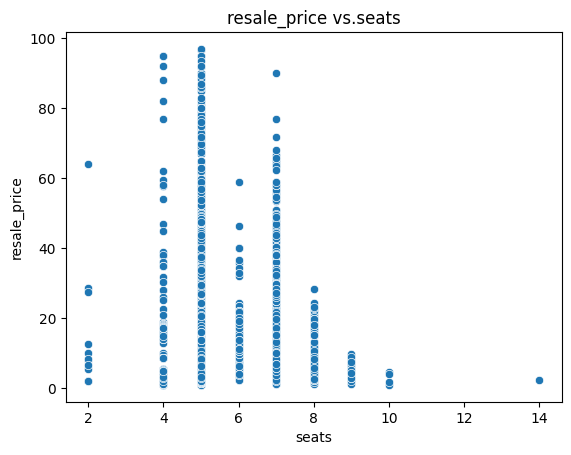

In [50]:
sns.scatterplot(x='seats', y='resale_price', data=Car_df)

plt.title('resale_price vs.seats')
plt.xlabel('seats')
plt.ylabel('resale_price')
plt.show()

<Axes: xlabel='seats', ylabel='resale_price'>

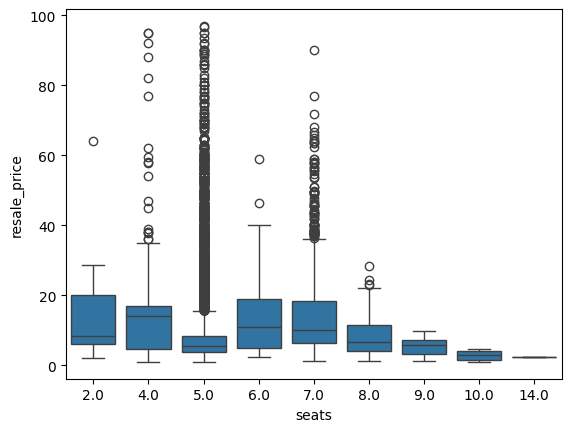

In [52]:
import seaborn as sns
sns.boxplot(x='seats', y='resale_price', data=Car_df)

<Axes: xlabel='seats', ylabel='resale_price'>

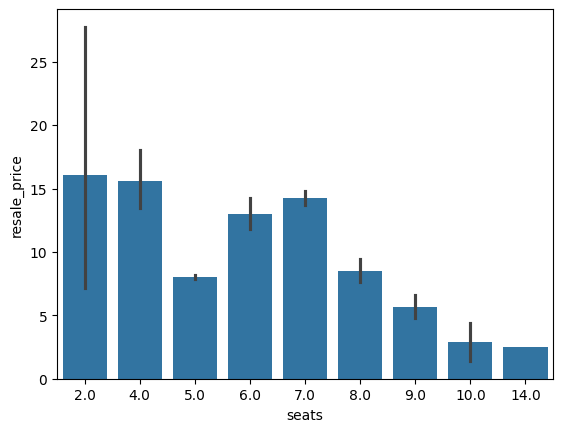

In [53]:
import seaborn as sns
sns.barplot(x='seats', y='resale_price', data=Car_df)

In [15]:
Car_df["mileage"] = Car_df["mileage"].fillna(np.mean(Car_df["mileage"]))
Car_df["resale_price"] = Car_df["resale_price"].fillna(np.mean(Car_df["resale_price"]))

In [16]:
np.corrcoef(Car_df["resale_price"], Car_df["mileage"])

array([[ 1.        , -0.28927369],
       [-0.28927369,  1.        ]])